# Frequency Analysis, Part 1

## Your name goes here. \(Double\-click on this cell to edit it.\)

Remember to hit Ctrl-Enter after editing any cell.



## Commands in python introduced in this module

---
>
___



## Math topics used in this module

*



## Objectives

In this activity we will use Python to conduct a frequency analysis of a piece of text.

## Preliminaries

We will need a list of the letters of the alphabet. While we could easily construct such a list manually, we might as well use a list that's built already. Such a list exists in the `string` library. (Throughout the module, you will need to remember to click on code cells and hit Ctrl-Enter.)

In [1]:
import string

Here are two versions of the alphabet, one uppercase and one lowercase (although we will not need the lowercase version in this module).

In [2]:
alph_upper = string.ascii_uppercase
alph_upper

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [3]:
alph_lower = string.ascii_lowercase
alph_lower

'abcdefghijklmnopqrstuvwxyz'

## Dictionaries

Before we get to the functions, let's learn about a very useful Python data type. It's called a "dictionary". Somewhat like a dictionary in which you'd look up the definition of a word, a Python dictionary allows you to look up values using a "key". Dictionaries use curly braces { and }.

Here is an example of fruits I have in my kitchen:

In [4]:
fruit_counts = {"apple": 8, "orange": 2, "banana": 4}

The "keys" are the fruit names. The "values" are the quantities. (In general, though, keys do not have to be strings, and values do not have to be numbers. You can store any kind of data in a dictionary.)

If we want to look up the value for a given key, we can do so as follows:

In [5]:
fruit_counts["banana"]

4

I can also change any of the values, say, after I go to the store and buy more oranges:

In [6]:
# I bought 3 more oranges
fruit_counts["orange"] = fruit_counts["orange"] + 3
# So how many oranges do I have now?
fruit_counts["orange"]

5

### Exercise 1

Below is a funny new piece of notation: `+=`.

In [7]:
fruit_counts["apple"] += 10

In the code cell below, check the number of apples in `fruit_counts`. Based on what you see, explain what `+=` does.

In [8]:
# Add code here to check the number of apples in fruit_counts

<span style='color:#9c27b0'>_Please write up your answer here._</span>


## Storing letter frequencies

We need to write a function that will go through a piece of text and count up all the letters used. We'll keep track of the letter frequencies in a dictionary called `frequencies`. Let's start with an empty dictionary:

In [9]:
frequencies = {}
frequencies

{}

Then we'll use a for loop to set up each uppercase letter as a key and 0 as the corresponding value.

In [10]:
for letter in alph_upper:
    frequencies[letter] = 0
frequencies

{'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 0,
 'I': 0,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 0,
 'N': 0,
 'O': 0,
 'P': 0,
 'Q': 0,
 'R': 0,
 'S': 0,
 'T': 0,
 'U': 0,
 'V': 0,
 'W': 0,
 'X': 0,
 'Y': 0,
 'Z': 0}

Finally, in one more for loop, we grab each letter of the text we're analyzing. The dictionary value is incremented by 1 for each letter we find.

In [56]:
text = "HELLOMYNAMEISBIANCA"
text2 = "HellomynameisBianca"
for letter in text2:
    frequencies[letter] += 1
frequencies

TypeError: list indices must be integers or slices, not str

Let's put this together in a function:

In [59]:
def analyze_frequencies_test1(text):
    # Store uppercase alphabet
    alph_upper = string.ascii_uppercase
    # Initialize frequencies to 0
    frequencies = {}
    for letter in alph_upper:
        frequencies[letter] = 0
    # Go through the text and for each letter,
    # add 1 to the value corresponding to that letter
    for letter in text:
        frequencies[letter] += 1
    return frequencies

In [63]:
analyze_frequencies_test1("HELLO MY")

KeyError: ' '

### Exercise 2

Test the `analyze_frequencies_test1` function on the string "Here is some text". You should get an error. Explain why. (Hint: while error messages in Python can be a bit inscrutable, the last line is usually the most informative.)

In [14]:
# Add code here to analyze the string "Here is some text"

<span style='color:#9c27b0'>_Please write up your answer here._</span>


**VERY IMPORTANT!** Since the last command should have resulted in an error, if we leave it alone, it may prevent future cells from running if we ever go back and run all the cells from the beginning of the document. Once you have verified that you get the appropriate error, go back into the code cell and put a hashtag at the beginning of the line. This will tell Python to ignore this code on future passes.

## Making our function more robust

The last error tells us that our function won't work very well when we have anything but uppercase letters in our text. Let's fix that.

One thing we can do is convert everything to uppercase first using `text.upper()`.

We still need to worry about anything that appears that's not a letter, including spaces! We'll use an if statement to check that we have an uppercase letter before we try to update the dictionary values.

Here is the next version of our function:

In [15]:
def analyze_frequencies_test2(text):
    # Store uppercase alphabet
    alph_upper = string.ascii_uppercase
    # Convert text to uppercase
    text = text.upper()
    # Initialize frequencies to 0
    frequencies = {}
    for letter in alph_upper:
        frequencies[letter] = 0
    # Go through the text and for each letter,
    # add 1 to the value corresponding to that letter
    for letter in text:
        if letter in alph_upper:
            frequencies[letter] += 1
    return frequencies

In [64]:
test_analysis = analyze_frequencies_test2("Here is some text!")
test_analysis

{'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'E': 4,
 'F': 0,
 'G': 0,
 'H': 1,
 'I': 1,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 1,
 'N': 0,
 'O': 1,
 'P': 0,
 'Q': 0,
 'R': 1,
 'S': 2,
 'T': 2,
 'U': 0,
 'V': 0,
 'W': 0,
 'X': 1,
 'Y': 0,
 'Z': 0}

### Exercise 3

Notice that there is no `else` statement below the `if` statement. Why do we not need one? In other words, what is supposed to happen to the `frequencies` dictionary if the `if` statement is not satisfied?

<span style='color:#9c27b0'>_Please write up your answer here._</span>


*****

As it stands currently, our function will output the counts of each letter. However, it might be more useful to see the values as percentages. Let's modify our function to be able to do that.

To get percentages, we have to divide each value by the total letter count. The values can be listed with `.values()`:

In [17]:
test_analysis = analyze_frequencies_test2("Here is some text!")
test_analysis.values()

dict_values([0, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0])

Then they can be summed:

In [18]:
total_letters = sum(test_analysis.values())
total_letters

14

Finally, we need to divide each value in the dictionary by this sum.

In [19]:
for letter in test_analysis:
    test_analysis[letter] = test_analysis[letter] / total_letters
test_analysis

{'A': 0.0,
 'B': 0.0,
 'C': 0.0,
 'D': 0.0,
 'E': 0.2857142857142857,
 'F': 0.0,
 'G': 0.0,
 'H': 0.07142857142857142,
 'I': 0.07142857142857142,
 'J': 0.0,
 'K': 0.0,
 'L': 0.0,
 'M': 0.07142857142857142,
 'N': 0.0,
 'O': 0.07142857142857142,
 'P': 0.0,
 'Q': 0.0,
 'R': 0.07142857142857142,
 'S': 0.14285714285714285,
 'T': 0.14285714285714285,
 'U': 0.0,
 'V': 0.0,
 'W': 0.0,
 'X': 0.07142857142857142,
 'Y': 0.0,
 'Z': 0.0}

The only additional thing we might want to do is convert these proportions to percentages by multiplying by 100 and then round the numbers to maybe 3 decimal places. See the implementation of these details in the `analyze_frequencies_test3` function below.

One more trick to show you. Look at the function below and notice that we've added an parameter `output_format` with a default value of "count" to the function signature. This will allow the user to set the output format. Since the default is "count", if the user does not specify anything for `output_format`, the output will consist of counts. But the user can also specify "percent". Since we've now introduced one more way that the user can screw up our function, there's a little new logic near the bottom of the function that enforces "count" or "percent" as the only options.

Look over the new lines of code carefully. Make sure you follow what each line of code is accomplishing.

In [20]:
def analyze_frequencies_test3(text, output_format = "count"):
    # Store uppercase alphabet
    alph_upper = string.ascii_uppercase
    # Convert text to uppercase
    text = text.upper()
    # Initialize frequencies to 0
    frequencies = {}
    for letter in alph_upper:
        frequencies[letter] = 0
    # Go through the text and for each letter,
    # add 1 to the value corresponding to that letter
    for letter in text:
        if letter in alph_upper:
            frequencies[letter] += 1
    # Check output format
    if output_format not in ["count", "percent"]:
        print('The output format must be either "count" or "percent".')
        return
    elif output_format == "percent":
        total_letters = sum(frequencies.values())
        for letter in frequencies:
            frequencies[letter] = round(100 * frequencies[letter]/total_letters, ndigits = 3)
    return frequencies

In [21]:
# The default for output_format is "count", so if no output_format is specified,
# the function will produce counts
test_analysis_count = analyze_frequencies_test3("Here is some text!")
test_analysis_count

{'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'E': 4,
 'F': 0,
 'G': 0,
 'H': 1,
 'I': 1,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 1,
 'N': 0,
 'O': 1,
 'P': 0,
 'Q': 0,
 'R': 1,
 'S': 2,
 'T': 2,
 'U': 0,
 'V': 0,
 'W': 0,
 'X': 1,
 'Y': 0,
 'Z': 0}

In [22]:
test_analysis_percent = analyze_frequencies_test3("Here is some text!", output_format = "percent")
test_analysis_percent

{'A': 0.0,
 'B': 0.0,
 'C': 0.0,
 'D': 0.0,
 'E': 28.571,
 'F': 0.0,
 'G': 0.0,
 'H': 7.143,
 'I': 7.143,
 'J': 0.0,
 'K': 0.0,
 'L': 0.0,
 'M': 7.143,
 'N': 0.0,
 'O': 7.143,
 'P': 0.0,
 'Q': 0.0,
 'R': 7.143,
 'S': 14.286,
 'T': 14.286,
 'U': 0.0,
 'V': 0.0,
 'W': 0.0,
 'X': 7.143,
 'Y': 0.0,
 'Z': 0.0}

In [23]:
# Test what happens if output_format is not "count" or "percent"
analyze_frequencies_test3("Here is some text!", output_format = "something_else")

The output format must be either "count" or "percent".


### Exercise 4

The `analyze_frequencies_test3` function prints a string when the user fails to specify "count" or "percent". Recall from an earlier module that we can enclose strings using either single quotes or double quotes. Typically, we use double quotes. Why do you suppose this string must be enclosed in single quotes then?

<span style='color:#9c27b0'>_Please write up your answer here._</span>


## Sorting

Looking ahead to the idea that frequency analysis will allow us to make better guesses when trying to decrypt messages, we would like to be able to match up the frequencies in our text to the known frequencies of letters in the English language. To do that, it will be useful to sort the letter frequencies from most frequent to least frequent. (For example, the most frequent letter in a large body of text is usually "E".)

The only real disadvantage of dictionaries (at least in this context) is that they are not super easy to sort based on their values.

To see why, let's list the values:

In [24]:
test_analysis_count.values()

dict_values([0, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0])

We can sort these with the `sorted` function:

In [25]:
sorted(test_analysis_count.values())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 4]

Of course, we will probably want the result in descending order instead of ascending order. We can set the `reverse` argument to `True`:

In [26]:
sorted(test_analysis_count.values(), reverse = True)

[4, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Great, so now the values are sorted. But there's a huge problem: we don't know which letters corresponded to these values!

Instead of just getting the values, let's get the "items" from the dictionary. What are the items? They consist of all the key-value pairs:

In [27]:
test_analysis_count.items()

dict_items([('A', 0), ('B', 0), ('C', 0), ('D', 0), ('E', 4), ('F', 0), ('G', 0), ('H', 1), ('I', 1), ('J', 0), ('K', 0), ('L', 0), ('M', 1), ('N', 0), ('O', 1), ('P', 0), ('Q', 0), ('R', 1), ('S', 2), ('T', 2), ('U', 0), ('V', 0), ('W', 0), ('X', 1), ('Y', 0), ('Z', 0)])

These pairs should now stay together when sorted.

But now we have another problem. If we try to use `sorted` on a dictionary, it will sort by the key, not the value.

The code to make this work is a little obscure. Take a look at the code cell below. The idea is that the `key` argument of the `sorted` function tells it how to do the sorting. Don't worry about the word `lambda` here. It would take us too far afield to try to explain why this word has to be there. You will not be required to build a function like this on your own. The takeaway here is that it finally works. We have a line of code that properly returns the set of letters in descending order of frequency.

In [28]:
sorted(test_analysis_count.items(), key = lambda item: item[1], reverse = True)

[('E', 4),
 ('S', 2),
 ('T', 2),
 ('H', 1),
 ('I', 1),
 ('M', 1),
 ('O', 1),
 ('R', 1),
 ('X', 1),
 ('A', 0),
 ('B', 0),
 ('C', 0),
 ('D', 0),
 ('F', 0),
 ('G', 0),
 ('J', 0),
 ('K', 0),
 ('L', 0),
 ('N', 0),
 ('P', 0),
 ('Q', 0),
 ('U', 0),
 ('V', 0),
 ('W', 0),
 ('Y', 0),
 ('Z', 0)]

### Exercise 5

The result of the `sorted` function above is no longer a dictionary. How can we tell that?

<span style='color:#9c27b0'>_Please write up your answer here._</span>


*****

In light of the exercise above, we need to convert our final output from a list to a dictionary. The `dict` command accomplishes that:

In [29]:
dict(sorted(test_analysis_count.items(), key = lambda item: item[1], reverse = True))

{'E': 4,
 'S': 2,
 'T': 2,
 'H': 1,
 'I': 1,
 'M': 1,
 'O': 1,
 'R': 1,
 'X': 1,
 'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'F': 0,
 'G': 0,
 'J': 0,
 'K': 0,
 'L': 0,
 'N': 0,
 'P': 0,
 'Q': 0,
 'U': 0,
 'V': 0,
 'W': 0,
 'Y': 0,
 'Z': 0}

### Exercise 6

Change the 1 in `item[1]` in the code cell below so that it reads `item[0]` instead. Can you figure out what that did? In other words, can you explain why you got the output you did? (Hint: how many "items" are there in each dictionary entry? Which item is 0 and which item is 1?)

In [30]:
# Modify the code below
dict(sorted(test_analysis_count.items(), key = lambda item: item[1], reverse = True))

{'E': 4,
 'S': 2,
 'T': 2,
 'H': 1,
 'I': 1,
 'M': 1,
 'O': 1,
 'R': 1,
 'X': 1,
 'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'F': 0,
 'G': 0,
 'J': 0,
 'K': 0,
 'L': 0,
 'N': 0,
 'P': 0,
 'Q': 0,
 'U': 0,
 'V': 0,
 'W': 0,
 'Y': 0,
 'Z': 0}

<span style='color:#9c27b0'>_Please write up your answer here._</span>


*****

With all that done, we can now produce the next iteration of our frequency analysis function. Like we did with the output format before, we will also let the user decide if they want the output to be in alphabetical order (the default) or sorted by letter frequency.

In [31]:
def analyze_frequencies_test4(text, output_format = "count", sort = False):
    # Store uppercase alphabet
    alph_upper = string.ascii_uppercase
    # Convert text to uppercase
    text = text.upper()
    # Initialize frequencies to 0
    frequencies = {}
    for letter in alph_upper:
        frequencies[letter] = 0
    # Go through the text and for each letter,
    # add 1 to the value corresponding to that letter
    for letter in text:
        if letter in alph_upper:
            frequencies[letter] += 1
    # Check output_format argument
    if output_format not in ["count", "percent"]:
        print('The output format must be either "count" or "percent".')
        return
    elif output_format == "percent":
        total_letters = sum(frequencies.values())
        for letter in frequencies:
            frequencies[letter] = round(100 * frequencies[letter]/total_letters, ndigits = 3)
    # Check sort argument
    if sort:
        frequencies = dict(sorted(frequencies.items(), key = lambda item: item[1], reverse = True))
    return frequencies

In [32]:
analyze_frequencies_test4("Here is some text!")

{'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'E': 4,
 'F': 0,
 'G': 0,
 'H': 1,
 'I': 1,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 1,
 'N': 0,
 'O': 1,
 'P': 0,
 'Q': 0,
 'R': 1,
 'S': 2,
 'T': 2,
 'U': 0,
 'V': 0,
 'W': 0,
 'X': 1,
 'Y': 0,
 'Z': 0}

In [33]:
analyze_frequencies_test4("Here is some text!", sort = True)

{'E': 4,
 'S': 2,
 'T': 2,
 'H': 1,
 'I': 1,
 'M': 1,
 'O': 1,
 'R': 1,
 'X': 1,
 'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'F': 0,
 'G': 0,
 'J': 0,
 'K': 0,
 'L': 0,
 'N': 0,
 'P': 0,
 'Q': 0,
 'U': 0,
 'V': 0,
 'W': 0,
 'Y': 0,
 'Z': 0}

In [34]:
analyze_frequencies_test4("Here is some text!", output_format = "percent", sort = True)

{'E': 28.571,
 'S': 14.286,
 'T': 14.286,
 'H': 7.143,
 'I': 7.143,
 'M': 7.143,
 'O': 7.143,
 'R': 7.143,
 'X': 7.143,
 'A': 0.0,
 'B': 0.0,
 'C': 0.0,
 'D': 0.0,
 'F': 0.0,
 'G': 0.0,
 'J': 0.0,
 'K': 0.0,
 'L': 0.0,
 'N': 0.0,
 'P': 0.0,
 'Q': 0.0,
 'U': 0.0,
 'V': 0.0,
 'W': 0.0,
 'Y': 0.0,
 'Z': 0.0}

## Plotting the results

Once we have calculated the letter frequencies and stored them in a dictionary, we can make a bar chart to visualize the letter distribution.

There are many ways to create plots in Python, and this module is not the place to get into it. To keep things simple, we'll import a common plotting library called PyPlot (part of Matplotlib). The abbreviation `plt` is standard. (This is called using an "alias". It saves us from having to type `matplotlib.pyplot` in front of every plotting command.)

In [35]:
import matplotlib.pyplot as plt

The function below is full of mystery. Explaining it all would be more complicated than it's worth. (If you really want to know, [here's a link](https://stackoverflow.com/questions/63804769/what-does-the-in-zip-and-d-items-doing).) Let's just sit back and enjoy the pretty pictures.

In [36]:
def freq_bar(letter_frequencies):
    plt.bar(*zip(*letter_frequencies.items()))
    plt.show()

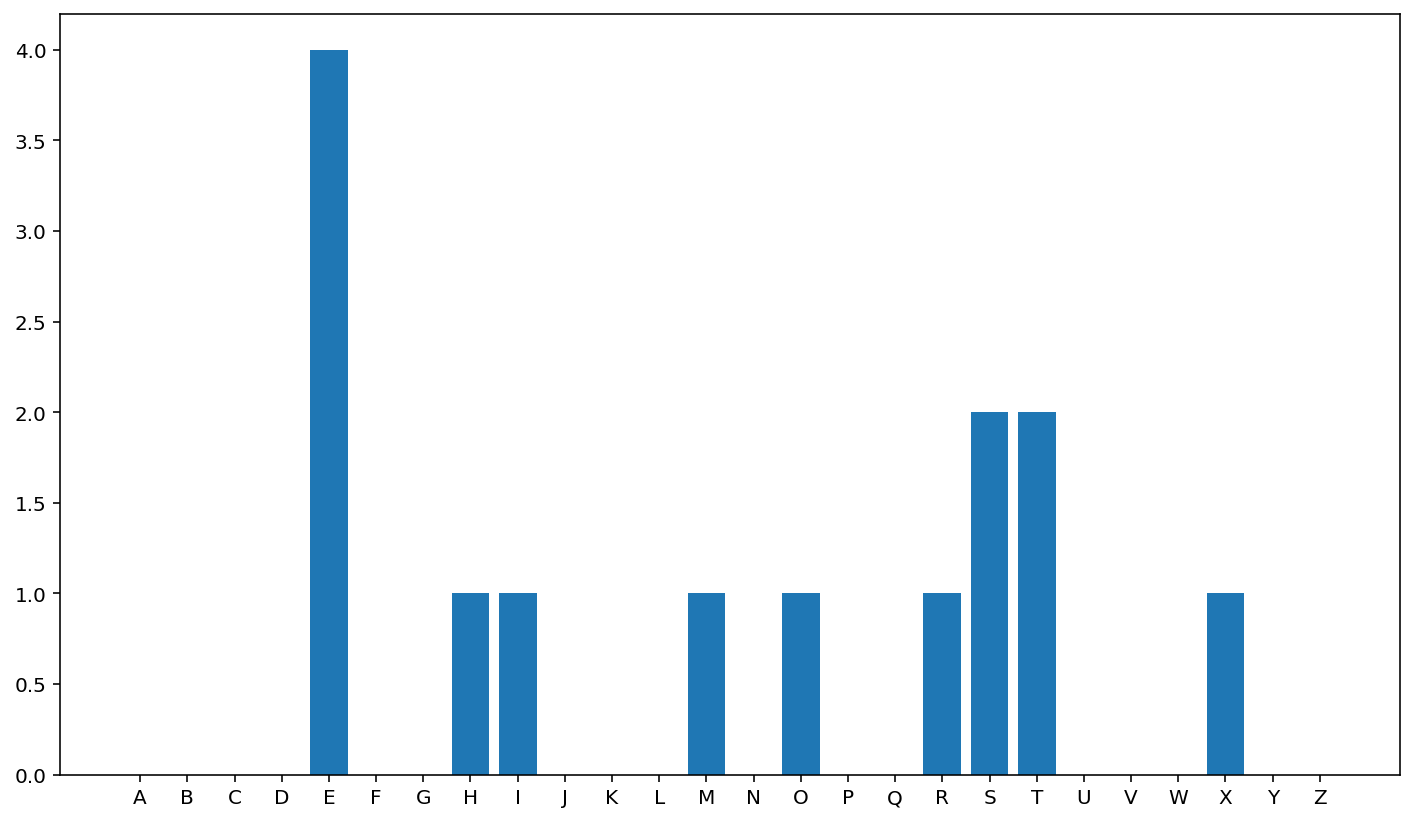

In [37]:
freq_bar(test_analysis_count)

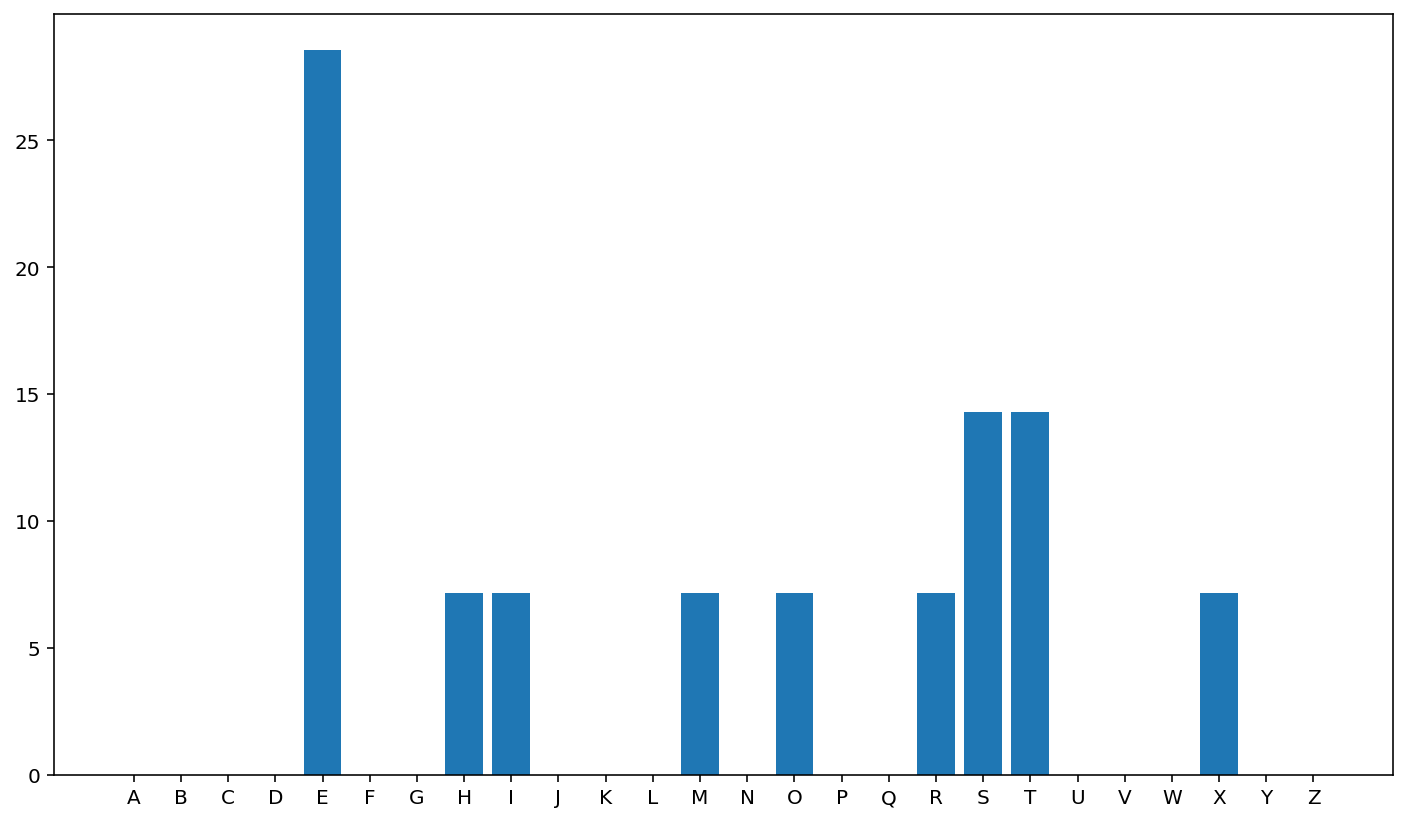

In [38]:
freq_bar(test_analysis_percent)

When doing cryptanalysis, we'll want to know the usual distribution of letters in English text. The numbers in the dictionary below come from the Wikipedia page on [letter frequency](https://en.wikipedia.org/wiki/Letter_frequency).

In [39]:
ENGLISH_LETTER_FREQ = {
    "A": 8.167,
    "B": 1.492,
    "C": 2.782,
    "D": 4.253,
    "E": 12.702,
    "F": 2.228,
    "G": 2.015,
    "H": 6.094,
    "I": 6.966,
    "J": 0.153,
    "K": 0.772,
    "L": 4.025,
    "M": 2.406,
    "N": 6.749,
    "O": 7.507,
    "P": 1.929,
    "Q": 0.095,
    "R": 5.987,
    "S": 6.327,
    "T": 9.056,
    "U": 2.758,
    "V": 0.978,
    "W": 2.360,
    "X": 0.150,
    "Y": 1.974,
    "Z": 0.074
}

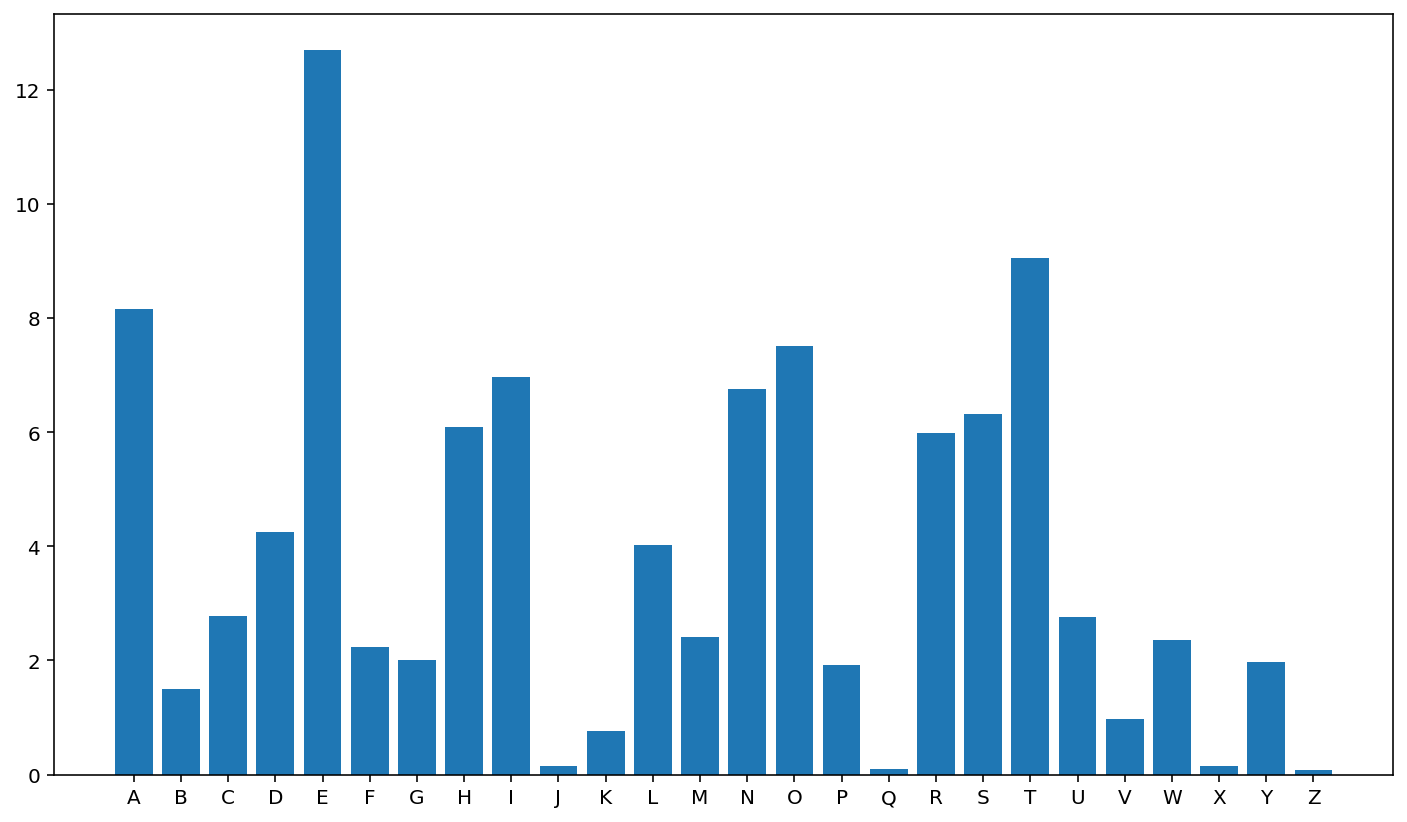

In [40]:
freq_bar(ENGLISH_LETTER_FREQ)

In [41]:
ENGLISH_LETTER_FREQ_SORT = dict(sorted(ENGLISH_LETTER_FREQ.items(), key = lambda item: item[1], reverse = True))

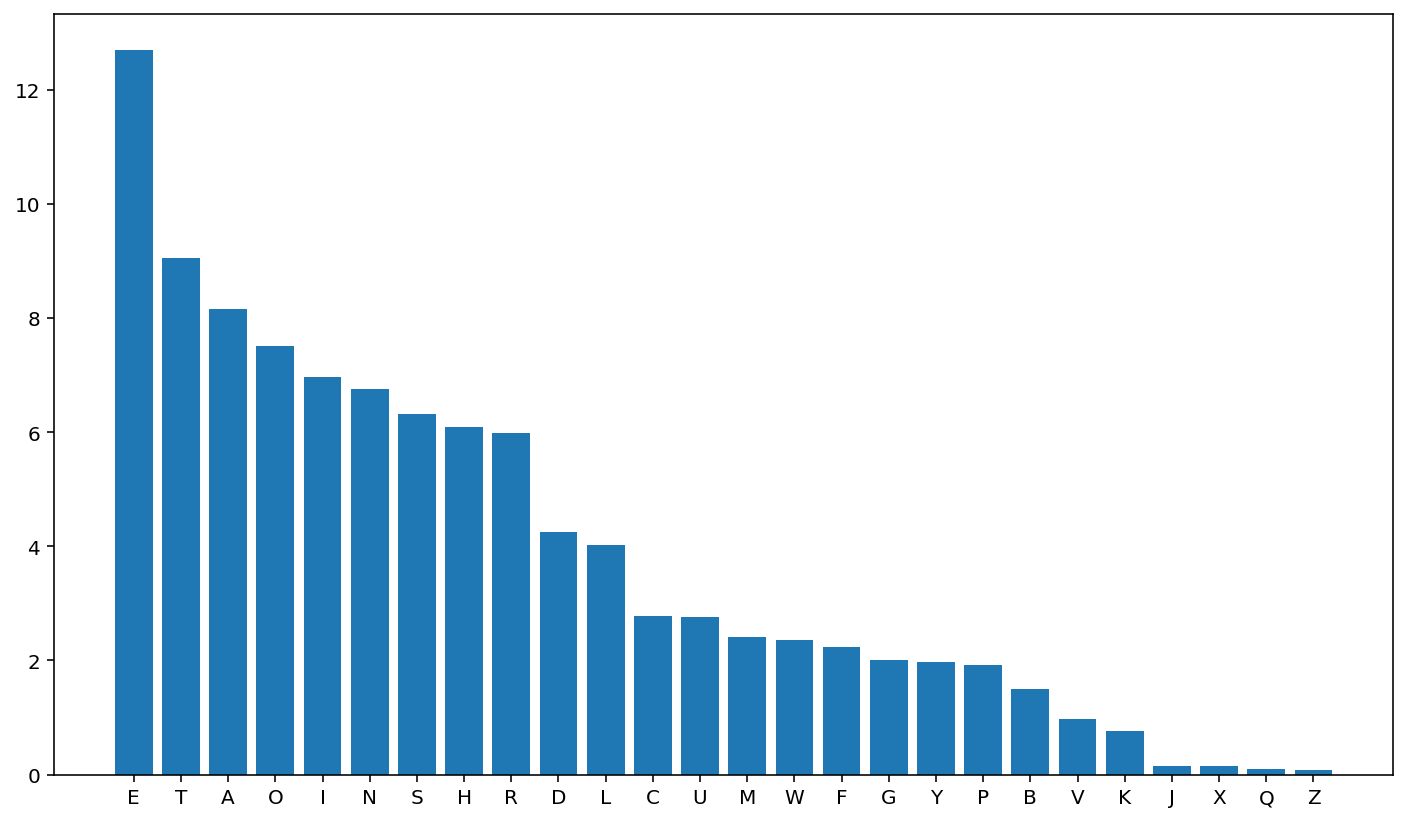

In [42]:
freq_bar(ENGLISH_LETTER_FREQ_SORT)

Let's incorporate bar graphs into our frequency analysis function. The final version of the function (I promise!) appears below. The only change is that we've added the `freq_bar` function to produce a bar graph in addition to the dictionary of frequency values.

In [43]:
def analyze_frequencies(text, output_format = "count", sort = False):
    # Store uppercase alphabet
    alph_upper = string.ascii_uppercase
    # Convert text to uppercase
    text = text.upper()
    # Initialize frequencies to 0
    frequencies = {}
    for letter in alph_upper:
        frequencies[letter] = 0
    # Go through the text and for each letter,
    # add 1 to the value corresponding to that letter
    for letter in text:
        if letter in alph_upper:
            frequencies[letter] += 1
    # Check output_format argument
    if output_format not in ["count", "percent"]:
        print('The output format must be either "count" or "percent".')
        return
    elif output_format == "percent":
        total_letters = sum(frequencies.values())
        for letter in frequencies:
            frequencies[letter] = round(100 * frequencies[letter]/total_letters, ndigits = 3)
    # Check sort argument
    if sort:
        frequencies = dict(sorted(frequencies.items(), key = lambda item: item[1], reverse = True))
    print(frequencies)
    # Create bar graph
    freq_bar(frequencies)

{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 4, 'F': 0, 'G': 0, 'H': 1, 'I': 1, 'J': 0, 'K': 0, 'L': 0, 'M': 1, 'N': 0, 'O': 1, 'P': 0, 'Q': 0, 'R': 1, 'S': 2, 'T': 2, 'U': 0, 'V': 0, 'W': 0, 'X': 1, 'Y': 0, 'Z': 0}


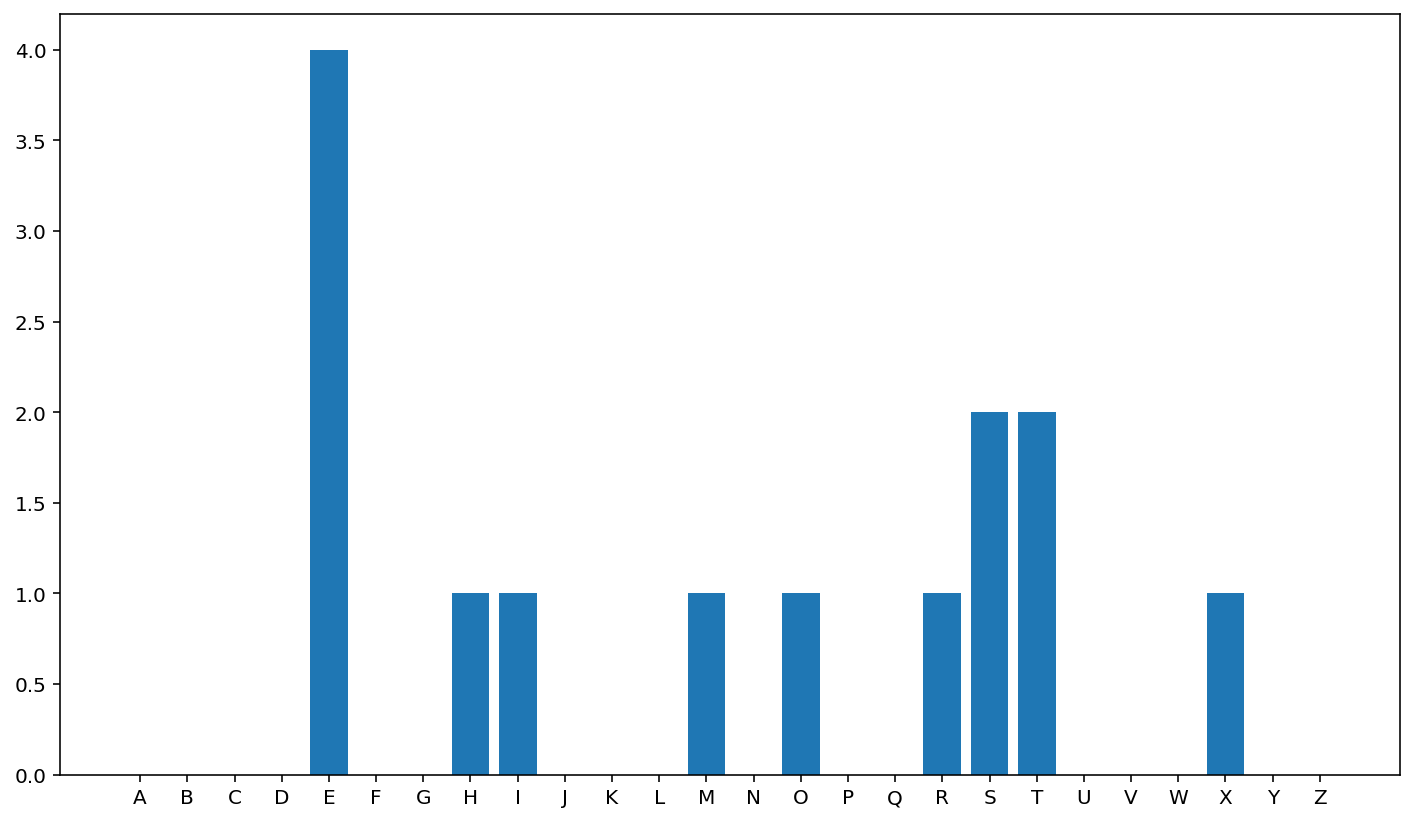

In [44]:
analyze_frequencies("Here is some text!")

{'E': 28.571, 'S': 14.286, 'T': 14.286, 'H': 7.143, 'I': 7.143, 'M': 7.143, 'O': 7.143, 'R': 7.143, 'X': 7.143, 'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'F': 0.0, 'G': 0.0, 'J': 0.0, 'K': 0.0, 'L': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'U': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0, 'Z': 0.0}


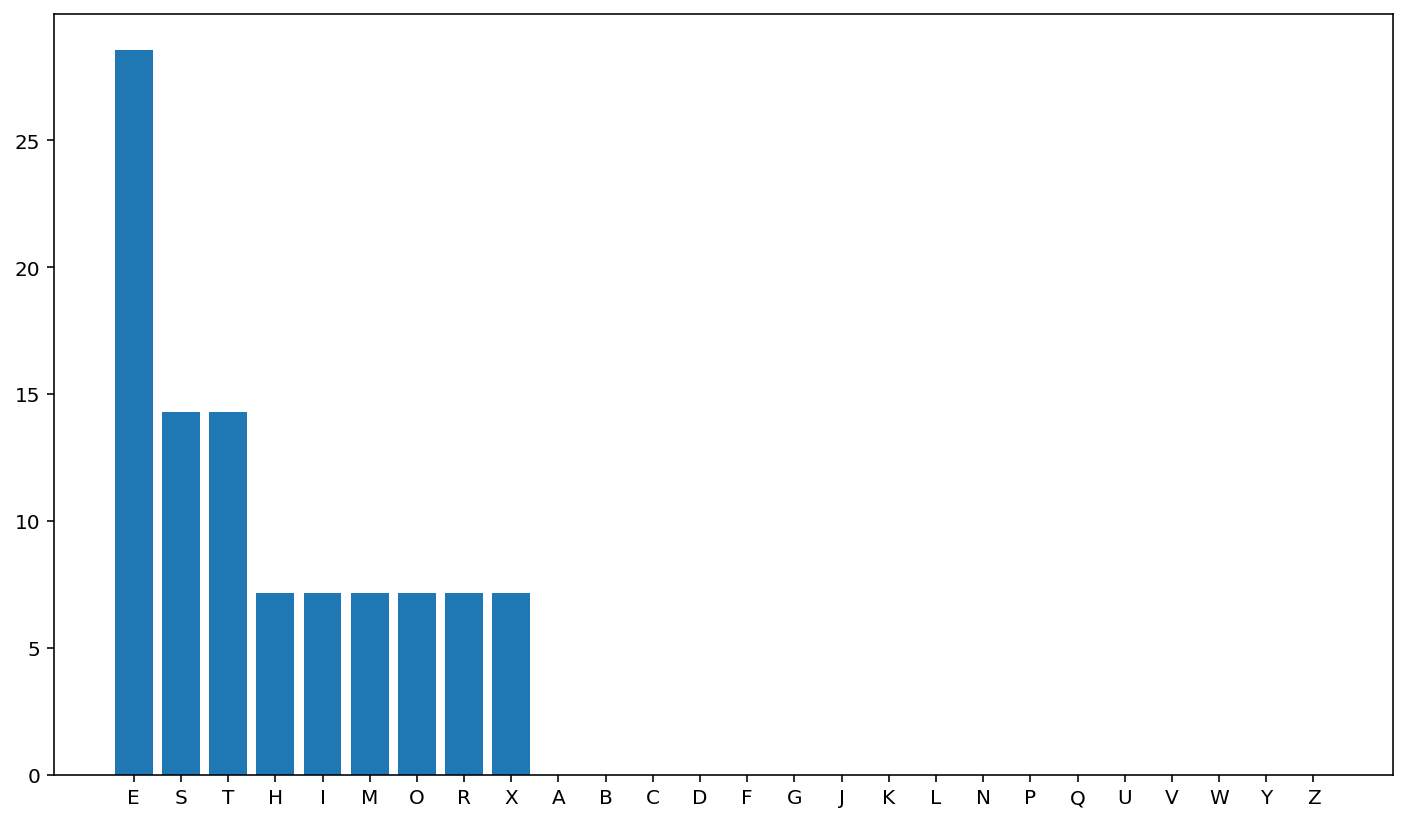

In [45]:
analyze_frequencies("Here is some text!", output_format = "percent", sort = True)

## Analyzing longer texts

Nothing prevents us from using our new function on longer pieces of text. For example, printed below is the very informative text of the Wikipedia page on ["Toilet paper orientation"](https://en.wikipedia.org/wiki/Toilet_paper_orientation). Since there are both apostrophes and double quotes in the article, we have to use triple (!) quotes to define this string.

In [46]:
toilet_paper = """
Some toilet roll holders or dispensers allow the toilet paper to hang in front of (over) or behind (under) the roll when it is placed parallel to the wall. This divides opinions about which orientation is better. Arguments range from aesthetics, hospitality, and cleanliness to paper conservation, ease of detaching sheets, and compatibility with pets.

The US advice column Ask Ann Landers reported that the subject was the most controversial issue in the column's history and, at 15,000 letters in 1986, provoked the highest number of responses. Some writers have proposed that preference for one orientation over the other may have connections to age, sex, or political philosophy, and survey evidence has shown a correlation with socioeconomic status.

The case study of "toilet paper orientation" is a widely used teaching tool in instruction sociology students in the practice of social constructionism.

Arguments

The main reasons given by people to explain why they hang their toilet paper a given way are ease of grabbing and habit.

The over position reduces the risk of accidentally brushing the wall or cabinet with one's knuckles, potentially transferring grime and germs; makes it easier to visually locate and to grasp the loose end; gives the option to fold over the last sheet to show that the room has been cleaned; and is generally the intended direction of viewing for the manufacturer's branding, so patterned toilet paper looks better this way.

The under position provides a tidier appearance, in that the loose end can be more hidden from view; reduces the risk of a toddler or a house pet such as a cat unrolling the toilet paper when batting at the roll; and in a recreational vehicle may reduce unrolling during driving. Partisans have claimed that each method makes it easier to tear the toilet paper on a perforated sheet boundary.

The over position is shown in illustrations with the first patents for a free-hanging toilet-roll holders, issued in 1891.

Various toilet paper dispensers are available which avoid the question of over or under orientation; for example, single sheet dispensers, jumbo roll dispensers in which the toilet roll is perpendicular to the wall, and twin roll dispensers. Swivelling toilet paper dispensers have been developed which allow the paper to be unrolled in either direction.

Public opinion

In various surveys, around 70% of people prefer the over position. In a survey of 1,000 Americans, Cottonelle found that "overs" are more likely than "unders" to notice a roll's direction (74 percent), to be annoyed when the direction is "incorrect" (24 percent), and to have flipped the direction at a friend's home (27 percent). According to W. C. Privy's Original Bathroom Companion, Number 2, "By more than 4 to 1, older folks prefer to have their toilet paper dispense over the front." The same claim is made by James Buckley's The Bathroom Companion for people older than 50. Toilet paper orientation is sometimes mentioned as a hurdle for married couples. The issue may also arise in businesses and public places. At the Amundsen–Scott Research Station at the South Pole, complaints have been raised over which way to install toilet paper. It is unclear if one orientation is more economical than the other. The Centralian Advocate attributes a claim to Planet Green that over saves on paper usage.

Uses in social studies

The case study of "toilet paper orientation" is an important teaching tool in instruction sociology students in the practice of social constructionism.

In the article "Bathroom Politics: Introducing Students to Sociological Thinking from the Bottom Up", Eastern Institute of Technology sociology professor Edgar Alan Burns describes some reasons toilet paper politics is worthy of examination. On the first day of Burns' introductory course in sociology, he asks his students, "Which way do you think a roll of toilet paper should hang?" In the following fifty minutes, the students examine why they picked their answers, exploring the social construction of "rules and practices which they have never consciously thought about before". Burns' activity has been adopted by a social psychology course at the University of Notre Dame, where it is used to illustrate the principles of Berger and Luckmann's 1966 classic The Social Construction of Reality.

Christopher Peterson, a professor of psychology at the University of Michigan, classifies the choice of toilet paper orientation under "tastes, preferences, and interests" as opposed to either values or "attitudes, traits, norms, and needs". Other personal interests include one's favorite cola or baseball team. Interests are an important part of identity; one expects and prefers that different people have different interests, which serves one's "sense of uniqueness". Differences in interests usually lead at most to teasing and gentle chiding. For most people, interests do not cause the serious divisions caused by conflicts of values; a possible exception is what Peterson calls "the 'get a life' folks among us" who elevate interests into moral issues.

Morton Ann Gernsbacher, a professor of psychology at the University of Wisconsin–Madison, compares the orientation of toilet paper to the orientation of cutlery in a dishwasher, the choice of which drawer in a chest of drawers to place one's socks, and the order of shampooing one's hair and lathering one's body in the shower. In each choice, there is a prototypical solution chosen by the majority, and it is tempting to offer simplistic explanations of how the minority must be different. She warns that neuroimaging experiments—which as of 2007 were beginning to probe behaviors from mental rotation and facial expressions to grocery shopping and tickling—must strive to avoid such cultural bias and stereotypes.

In his book Conversational Capital, Bertrand Cesvet gives toilet paper placement as an example of ritualized behavior—one of the ways designers and marketers can create a memorable experience around a product that leads to word-of-mouth momentum. Cesvet's other examples include shaking a box of Tic Tacs and dissecting Oreo cookies.
"""

{'A': 361, 'B': 62, 'C': 185, 'D': 153, 'E': 615, 'F': 94, 'G': 74, 'H': 218, 'I': 403, 'J': 4, 'K': 24, 'L': 211, 'M': 93, 'N': 358, 'O': 450, 'P': 161, 'Q': 2, 'R': 332, 'S': 375, 'T': 470, 'U': 120, 'V': 66, 'W': 55, 'X': 15, 'Y': 69, 'Z': 1}


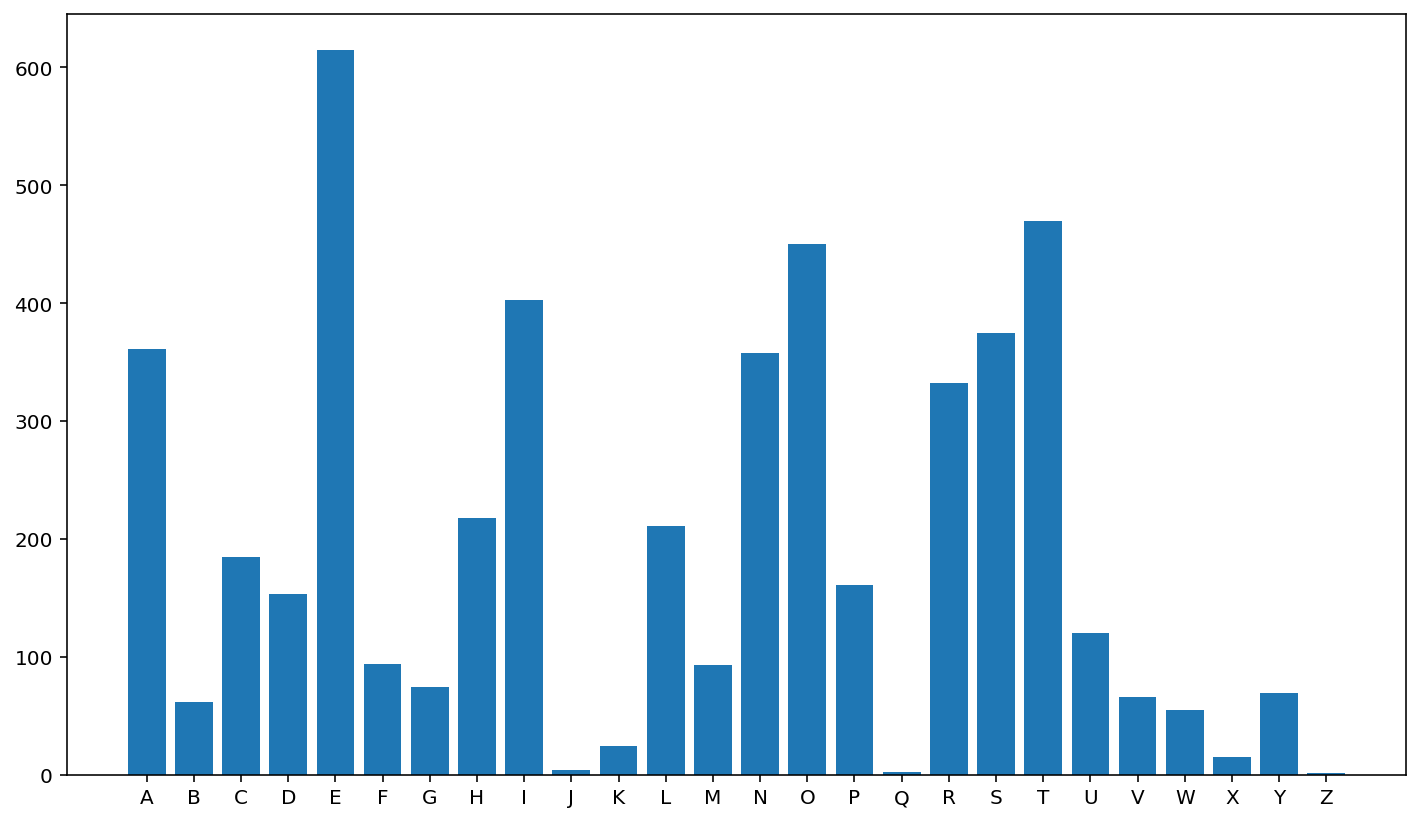

In [47]:
analyze_frequencies(toilet_paper)

{'E': 12.372, 'T': 9.455, 'O': 9.053, 'I': 8.107, 'S': 7.544, 'A': 7.262, 'N': 7.202, 'R': 6.679, 'H': 4.385, 'L': 4.245, 'C': 3.722, 'P': 3.239, 'D': 3.078, 'U': 2.414, 'F': 1.891, 'M': 1.871, 'G': 1.489, 'Y': 1.388, 'V': 1.328, 'B': 1.247, 'W': 1.106, 'K': 0.483, 'X': 0.302, 'J': 0.08, 'Q': 0.04, 'Z': 0.02}


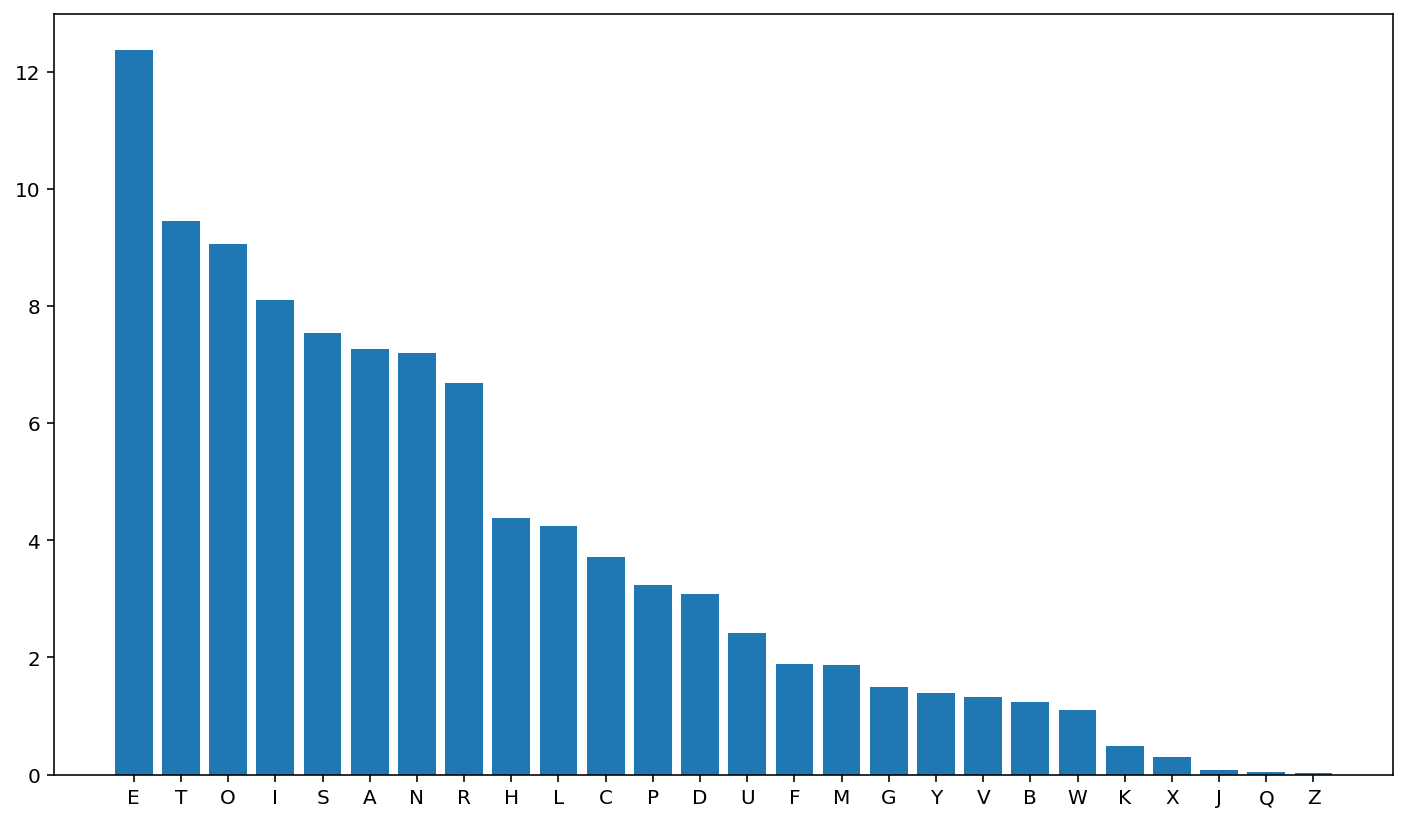

In [48]:
analyze_frequencies(toilet_paper, output_format = "percent", sort = True)

### Exercise 7

Find a long-ish piece of text somewhere on the web. Copy and paste it into the code cell below (inside the triple quotes). Then, perform a frequency analysis of the text, both by count and by percent. The percent one should be sorted. 

In [49]:
my_text = """
COPY AND PASTE YOUR TEXT HERE
"""

In [50]:
# Add code here to produce a frequency analysis of your text by count

In [51]:
# Add code here to produce a sorted frequency analysis of your text by percent

## Conclusion

Frequency analysis is relatively easy to code in Python. The automation of this otherwise tedious task will be greatly beneficial in the future when we apply this technique to ciphertext. By matching frequencies, we will be able to make educated guesses about which plaintext letters are represented by which ciphertext letters.